# **Car price prediction**

In [378]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [379]:
# reading the dataset
df = pd.read_csv("z_Car.csv")

In [380]:
# showing first five rows
df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# **Missing Values**

In [381]:
df.isnull().sum()

Unnamed: 0         0
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           221
seats            221
dtype: int64

In [382]:
#Droppin missing values and reset the index
df = df.dropna()
df = df.reset_index(drop=True)

# **Columns**

In [383]:
'''Seats'''

print(df["seats"].unique())
print(df["seats"].dtype)
print(df["seats"].value_counts())

[ 5.  4.  7.  8.  6.  9. 10. 14.  2.]
float64
5.0     6254
7.0     1120
8.0      235
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64


In [384]:
'''Torque'''

# object dtype ---- str or multiple datatypes
# Below column is not able to modified
df.drop(columns="torque",inplace=True)

In [385]:
'''max_power'''

print(df["max_power"].dtype)

def fxn(x):
    return x.split(" ")[0]

df["max_power"] = df["max_power"].apply(fxn)

#df['max_power']=df['max_power'].astype("float32")
#Above line create error

corrupt = []
for i in range(len(df)):
    try:
        float(df.iloc[i,-2])
    except:
        corrupt.append(i)

df = df.drop(index=corrupt)
df = df.reset_index(drop=True)

df['max_power']=df['max_power'].astype("float32")
print(df['max_power'].dtype)


object
float32


In [386]:
'''engine'''

print(df["engine"].dtype)
df['engine']=df['engine'].apply(fxn)
#df['engine']=df['engine'].astype("float32")
corrupt=[]
for i in range(len(df)):
    try:
            float(df.iloc[i,-3])
    except:
        corrupt.append(i)
df=df.drop(index=corrupt)
df=df.reset_index(drop=True)    

df['engine']=df['engine'].astype("float32")
print(df['engine'].dtype)


object
float32


In [387]:
'''Mileage'''

print(df["mileage"].dtype)
df['mileage']=df['mileage'].apply(fxn)
df['mileage']=df['mileage'].astype("float32")
print(df['mileage'].dtype)


object
float32


In [388]:
'''owner'''

print(df["owner"].value_counts())
print(df['owner'].dtype)
df['owner']=df['owner'].replace({"Fifth":"Fourth & Above Owner"})
print(df['owner'].value_counts())

# filtering

f = df["owner"] == "Test Drive Car"
df = df.drop(index=df[f].index)
df = df.reset_index(drop=True)
print(df["owner"].value_counts())

First Owner             5214
Second Owner            2015
Third Owner              510
Fifth                     86
Fourth & Above Owner      74
Test Drive Car             5
Name: owner, dtype: int64
object
First Owner             5214
Second Owner            2015
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64
First Owner             5214
Second Owner            2015
Third Owner              510
Fourth & Above Owner     160
Name: owner, dtype: int64


In [389]:
'''transmission'''

print(df["transmission"].value_counts())

Manual       6862
Automatic    1037
Name: transmission, dtype: int64


Individual          6561
Dealer              1102
Trustmark Dealer     236
Name: seller_type, dtype: int64


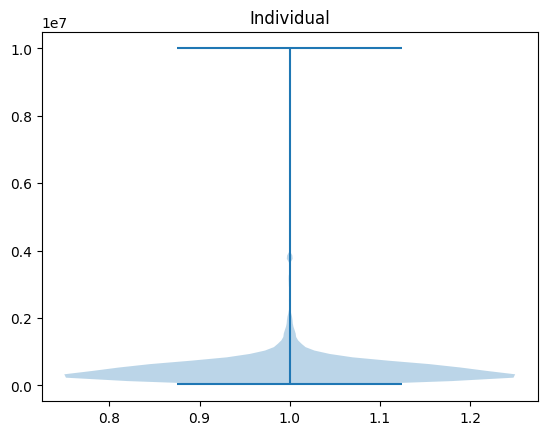

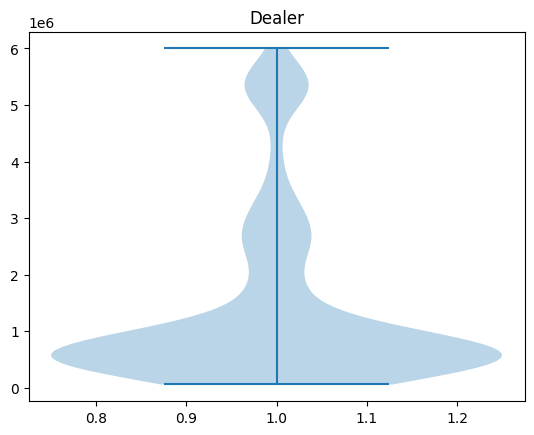

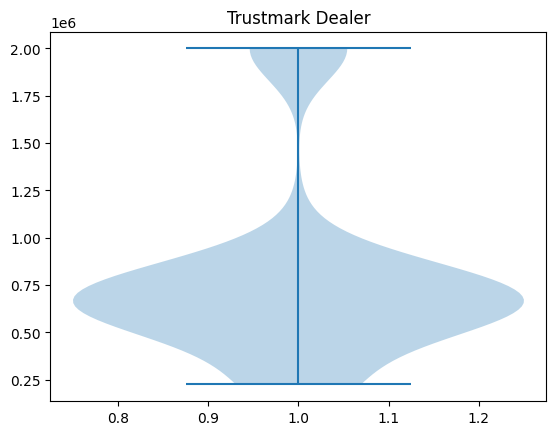

In [390]:
'''seller type'''

print(df["seller_type"].value_counts())

# filtering
f = df["seller_type"]=="Individual"
data = df.loc[f,"selling_price"]
plt.violinplot(data)
plt.title("Individual")
plt.show()


f = df["seller_type"]=="Dealer"
data1 = df.loc[f,"selling_price"]
plt.violinplot(data1)
plt.title("Dealer")
plt.show()


f = df["seller_type"]=="Trustmark Dealer"
data2 = df.loc[f,"selling_price"]
plt.violinplot(data2)
plt.title("Trustmark Dealer")
plt.show()

Diesel    4298
Petrol    3514
CNG         52
LPG         35
Name: fuel, dtype: int64


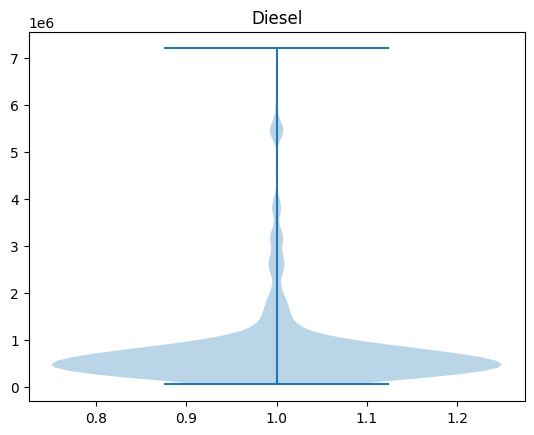

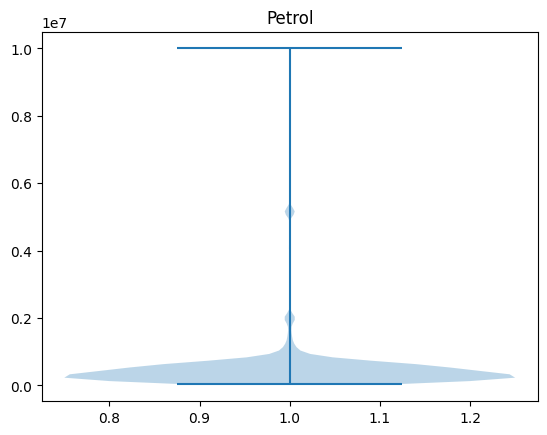

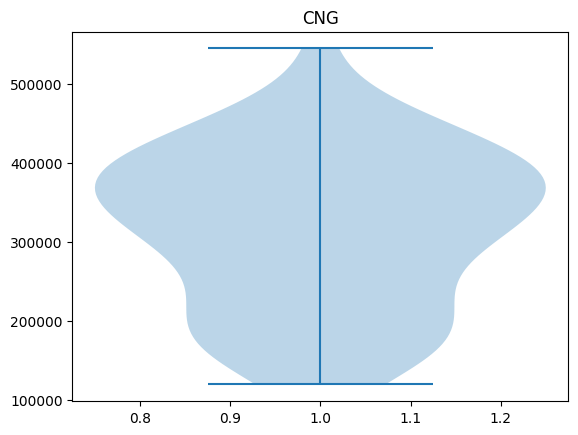

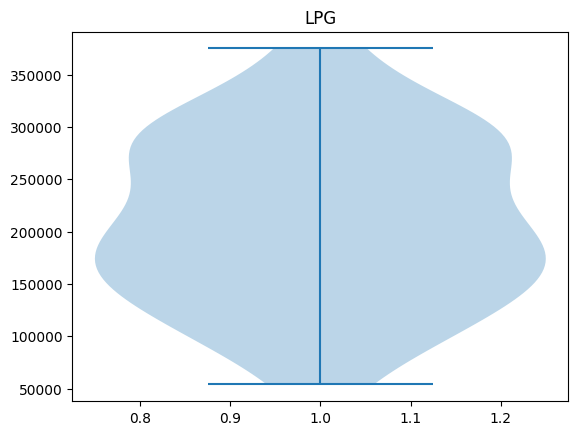

In [391]:
'''fuel'''
print(df["fuel"].value_counts())


f = df["fuel"]=="Diesel"
data2 = df.loc[f,"selling_price"]
plt.violinplot(data2)
plt.title("Diesel")
plt.show()

f = df["fuel"]=="Petrol"
data2 = df.loc[f,"selling_price"]
plt.violinplot(data2)
plt.title("Petrol")
plt.show()

f = df["fuel"]=="CNG"
data2 = df.loc[f,"selling_price"]
plt.violinplot(data2)
plt.title("CNG")
plt.show()

f = df["fuel"]=="LPG"
data2 = df.loc[f,"selling_price"]
plt.violinplot(data2)
plt.title("LPG")
plt.show()

df["fuel"] = df["fuel"].replace({"Petrol":0,"Diesel":0,"CNG":1,"LPG":1})

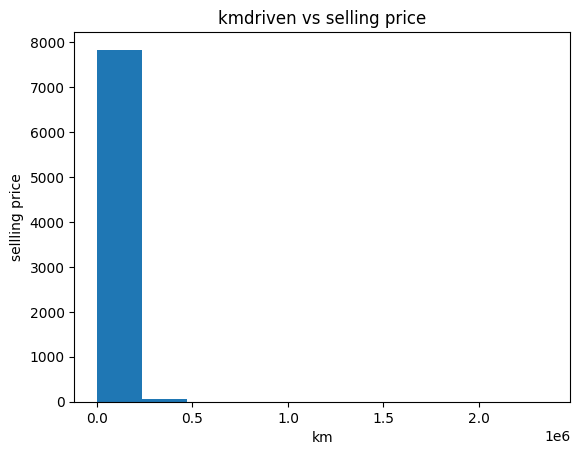

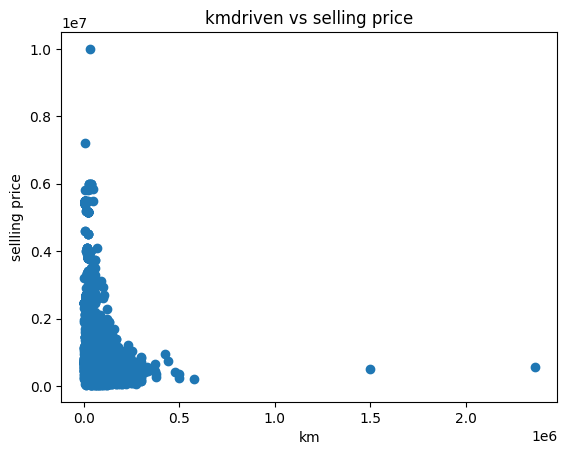

In [392]:
'''km_driven'''

plt.hist(df["km_driven"])
plt.title("kmdriven vs selling price")
plt.xlabel("km")
plt.ylabel("sellling price")
plt.show()

plt.scatter(df["km_driven"],df["selling_price"])
plt.title("kmdriven vs selling price")
plt.xlabel("km")
plt.ylabel("sellling price")
plt.show()

# will remove the outliers

In [393]:
'''name - important'''

df["name"].nunique()

def convert(x):
    temp = x.split()
    return temp[0]

df['name'] = df["name"].apply(convert)

print(df["name"].nunique())
print(df["name"].unique())

avg_of_brand = df.groupby("name")["selling_price"].mean()
avg_of_brand = avg_of_brand.sort_values(ascending=False)

31
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']


In [394]:
def changer(x):
    if x in avg_of_brand[0:10]:
        return 0
    elif x in avg_of_brand[10:20]:
        return 1
    elif x in avg_of_brand[20:]:
        return 2

df["name"] = df["name"].apply(changer)
df["name"].value_counts()

In [396]:
df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,2,2014,450000,145500,0,Individual,Manual,First Owner,23.400000,1248.0,74.000000,5.0
1,1,1,2014,370000,120000,0,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,5.0
2,2,1,2006,158000,140000,0,Individual,Manual,Third Owner,17.700001,1497.0,78.000000,5.0
3,3,1,2010,225000,127000,0,Individual,Manual,First Owner,23.000000,1396.0,90.000000,5.0
4,4,2,2007,130000,120000,0,Individual,Manual,First Owner,16.100000,1298.0,88.199997,5.0


# **Feature Selection**

In [398]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [399]:
numeric = df[["max_power","engine","mileage","km_driven","selling_price","year"]]
categorical = df[["name","fuel","seller_type","transmission","owner","seats"]]

               max_power    engine   mileage  km_driven  selling_price  \
max_power       1.000000  0.704240 -0.374148  -0.036686       0.750335   
engine          0.704240  1.000000 -0.576354   0.207376       0.457972   
mileage        -0.374148 -0.576354  1.000000  -0.173624      -0.124687   
km_driven      -0.036686  0.207376 -0.173624   1.000000      -0.221519   
selling_price   0.750335  0.457972 -0.124687  -0.221519       1.000000   
year            0.225322  0.017638  0.329372  -0.428540       0.412465   

                   year  
max_power      0.225322  
engine         0.017638  
mileage        0.329372  
km_driven     -0.428540  
selling_price  0.412465  
year           1.000000  


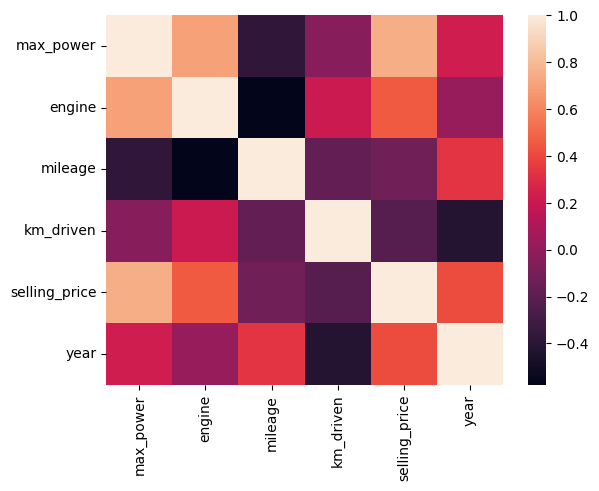

In [401]:
print(numeric.corr())
sns.heatmap(numeric.corr())
plt.show()

it means all columns are important

# **Encoding for categorical column**

In [402]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [403]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le1 = LabelEncoder()
categorical["owner"] =le.fit_transform(categorical["owner"])
categorical["transmission"] = le1.fit_transform(categorical["transmission"])

In [404]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("encode",OneHotEncoder(drop="first",sparse=False),[2])],remainder="passthrough")
categorical = ct.fit_transform(categorical)

In [405]:
categorical

array([[1., 0., 2., ..., 1., 0., 5.],
       [1., 0., 1., ..., 1., 2., 5.],
       [1., 0., 1., ..., 1., 3., 5.],
       ...,
       [1., 0., 2., ..., 1., 0., 5.],
       [1., 0., 2., ..., 1., 0., 5.],
       [1., 0., 2., ..., 1., 0., 5.]])

In [406]:
categorical = pd.DataFrame(categorical)

# **Feature Selection**


In [408]:
# ANOVA Test
from sklearn.feature_selection import SelectKBest,f_classif
kbest = SelectKBest(f_classif,k=categorical.shape[1])
kbest.fit_transform(categorical,numeric['selling_price'])
print("F values\n",kbest.scores_)

F values
 [ 6.988322    6.69782293  8.20570901  1.66252386 12.03276301  3.40499271
  2.66180735]


# **Outlier Detection**

In [409]:
numeric

,max_power,engine,mileage,km_driven,selling_price,year
0,74.000000,1248.0,23.400000,145500,450000,2014
1,103.519997,1498.0,21.139999,120000,370000,2014
2,78.000000,1497.0,17.700001,140000,158000,2006
3,90.000000,1396.0,23.000000,127000,225000,2010
4,88.199997,1298.0,16.100000,120000,130000,2007
...,...,...,...,...,...,...
7894,82.849998,1197.0,18.500000,110000,320000,2013
7895,110.000000,1493.0,16.799999,119000,135000,2007
7896,73.900002,1248.0,19.299999,120000,382000,2009
7897,70.000000,1396.0,23.570000,25000,290000,2013


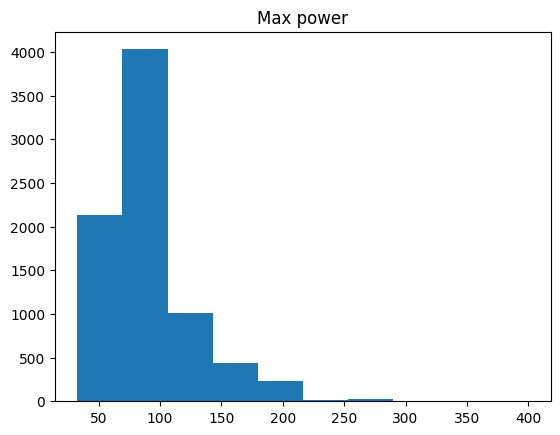

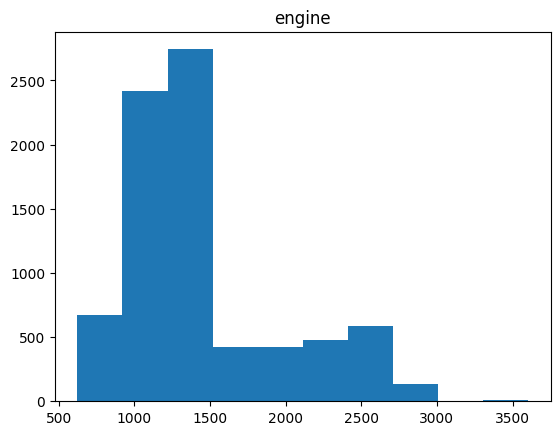

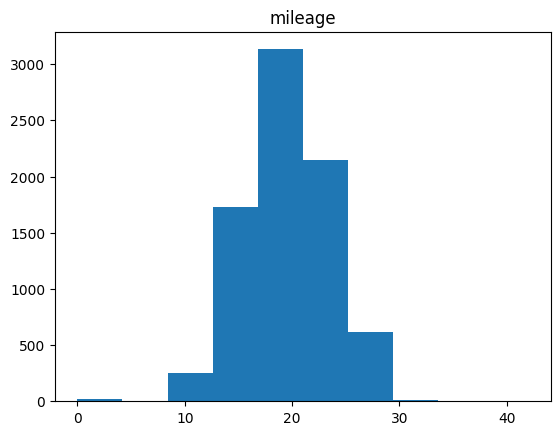

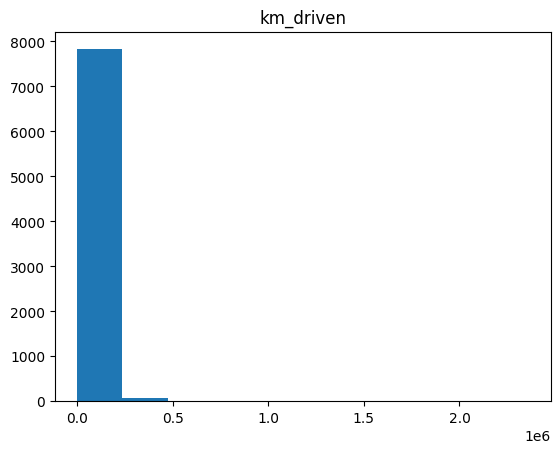

In [410]:
# histogram
plt.hist(numeric["max_power"])
plt.title("Max power")
plt.show()

plt.hist(numeric["engine"])
plt.title("engine")
plt.show()

plt.hist(numeric["mileage"])
plt.title("mileage")
plt.show()

plt.hist(numeric["km_driven"])
plt.title("km_driven")
plt.show()

In [411]:
def z_score(x):
    mean = np.mean(x)
    std = np.std(x)
    Z=(x-mean)/std
    z = Z.abs()
    return x[Z>3]

# Detection of outliers
outliers1 = z_score(numeric['mileage'])
outliers2 = z_score(numeric["max_power"])
outliers3 = z_score(numeric["km_driven"])

# **Scaling**

In [412]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
data=minmax.fit_transform(numeric[['engine','selling_price']])

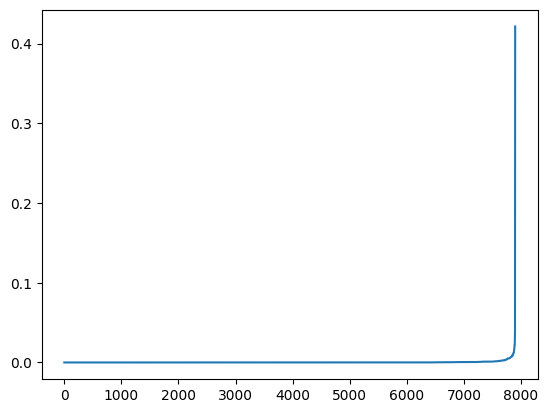

In [413]:
# k distance graph to find perfect value of epsilon
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=2)
n=neigh.fit(data)

distance,index=n.kneighbors(data)

distance=distance[:,-1]
distance.sort()

plt.plot(distance)


In [414]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.04,min_samples=2)
model.fit(data)

# creating an outlier dataframe
outliers4 = pd.DataFrame(data[model.labels_ == -1])
outliers5 = outliers4[1]
outliers4 = outliers4[0]

In [416]:
# Removing the outliers
numeric = numeric[~numeric['mileage'].isin(outliers1)]
numeric = numeric[~numeric['max_power'].isin(outliers2)]
numeric = numeric[~numeric['km_driven'].isin(outliers3)]
numeric = numeric[~numeric['engine'].isin(outliers4)]
numeric = numeric[~numeric['selling_price'].isin(outliers4)]

In [417]:
# Removing correspond rows from the categorical columns
categorical = categorical[categorical.index.isin(numeric.index)]

In [418]:
print(numeric.head())
print(categorical.head())

    max_power  engine    mileage  km_driven  selling_price  year
0   74.000000  1248.0  23.400000     145500         450000  2014
1  103.519997  1498.0  21.139999     120000         370000  2014
2   78.000000  1497.0  17.700001     140000         158000  2006
3   90.000000  1396.0  23.000000     127000         225000  2010
4   88.199997  1298.0  16.100000     120000         130000  2007
     0    1    2    3    4    5    6
0  1.0  0.0  2.0  0.0  1.0  0.0  5.0
1  1.0  0.0  1.0  0.0  1.0  2.0  5.0
2  1.0  0.0  1.0  0.0  1.0  3.0  5.0
3  1.0  0.0  1.0  0.0  1.0  0.0  5.0
4  1.0  0.0  2.0  0.0  1.0  0.0  5.0


In [419]:
df = pd.concat([numeric,categorical],axis=1,join='inner')

In [420]:
df.head()

,max_power,engine,mileage,km_driven,selling_price,year,0,1,2,3,4,5,6
0,74.000000,1248.0,23.400000,145500,450000,2014,1.0,0.0,2.0,0.0,1.0,0.0,5.0
1,103.519997,1498.0,21.139999,120000,370000,2014,1.0,0.0,1.0,0.0,1.0,2.0,5.0
2,78.000000,1497.0,17.700001,140000,158000,2006,1.0,0.0,1.0,0.0,1.0,3.0,5.0
3,90.000000,1396.0,23.000000,127000,225000,2010,1.0,0.0,1.0,0.0,1.0,0.0,5.0
4,88.199997,1298.0,16.100000,120000,130000,2007,1.0,0.0,2.0,0.0,1.0,0.0,5.0


# **Dependent and independent Variable**

In [421]:
df.columns

Index([    'max_power',        'engine',       'mileage',     'km_driven',
       'selling_price',          'year',               0,               1,
                     2,               3,               4,               5,
                     6],
      dtype='object')

In [422]:
X = df.drop(columns=['selling_price'],axis=1)
y = df['selling_price']

In [426]:
X

,max_power,engine,mileage,km_driven,year,0,1,2,3,4,5,6
0,74.000000,1248.0,23.400000,145500,2014,1.0,0.0,2.0,0.0,1.0,0.0,5.0
1,103.519997,1498.0,21.139999,120000,2014,1.0,0.0,1.0,0.0,1.0,2.0,5.0
2,78.000000,1497.0,17.700001,140000,2006,1.0,0.0,1.0,0.0,1.0,3.0,5.0
3,90.000000,1396.0,23.000000,127000,2010,1.0,0.0,1.0,0.0,1.0,0.0,5.0
4,88.199997,1298.0,16.100000,120000,2007,1.0,0.0,2.0,0.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7894,82.849998,1197.0,18.500000,110000,2013,1.0,0.0,1.0,0.0,1.0,0.0,5.0
7895,110.000000,1493.0,16.799999,119000,2007,1.0,0.0,1.0,0.0,1.0,1.0,5.0
7896,73.900002,1248.0,19.299999,120000,2009,1.0,0.0,2.0,0.0,1.0,0.0,5.0
7897,70.000000,1396.0,23.570000,25000,2013,1.0,0.0,2.0,0.0,1.0,0.0,5.0


# **Standard Scaaling**

In [427]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X.columns = X.columns.astype(str)
X = sc.fit_transform(X)
X

array([[-0.49174781, -0.39480585,  0.98672055, ...,  0.37356662,
        -0.6908065 , -0.43060894],
       [ 0.42385051,  0.12552299,  0.41747852, ...,  0.37356662,
         1.22012417, -0.43060894],
       [-0.36768298,  0.12344168, -0.44897794, ...,  0.37356662,
         2.1755895 , -0.43060894],
       ...,
       [-0.49484938, -0.39480585, -0.04597516, ...,  0.37356662,
        -0.6908065 , -0.43060894],
       [-0.61581263, -0.08677118,  1.02953965, ...,  0.37356662,
        -0.6908065 , -0.43060894],
       [-0.61581263, -0.08677118,  1.02953965, ...,  0.37356662,
        -0.6908065 , -0.43060894]])

# **Splitting**

In [430]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# **Training And Testing**

In [431]:
'''Linear Regression'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

print(r2_score(y_test,y_pred))

0.6623437047950702


In [432]:
'''SVM'''
from sklearn.svm import SVR
regressor = SVR(C=5000,kernel="poly")
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
print(r2_score(y_test,y_pred))

0.8592106306129519


In [433]:
'''Decision Tree'''
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=10,min_samples_split=20)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
print(r2_score(y_test,y_pred))

0.9566485925004212
